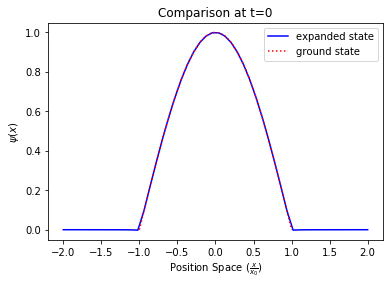

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar

#n-th stationary state in potential well [-w, w]
def stationary_state(n, w, x):
    
    return np.sqrt(1/w)*np.sin((n*np.pi)*(x + w)/(2*w))

#coeffiecents of expansion
def cn(n):
    
    return -(4*np.sqrt(2)*(np.sin(np.pi*n/4) + np.sin(3*np.pi*n/4)))/(np.pi*(n**2 -4))
    
#expanded state    
def ψ(cs, w, x):
    
    result = 0
    
    #sum over odd ns
    for n in range(len(cs)):      
        result = result + cs[n]*stationary_state(2*n+1, w, x)
        
    return result

    
#plot first 100 terms in series expansion
x_0 = 1
w = 2*x_0
xs = np.linspace(-w,w)
order = 100

cs = cn(np.arange(1, order, 2))

#plot expanded state
plt.plot(xs,  ψ(cs, w, xs), label="expanded state", color="blue")
#for comparison, plot ground state
plt.plot(np.linspace(-x_0, x_0), stationary_state(1, x_0, np.linspace(-x_0, x_0)), linestyle=':', color='red', label="ground state")
plt.legend()
plt.xlabel(r'Position Space ($\frac{x}{x_0}$)')
plt.ylabel(r'$\psi (x)$')
plt.title("Comparison at t=0")
plt.show()

<IPython.core.display.Javascript object>


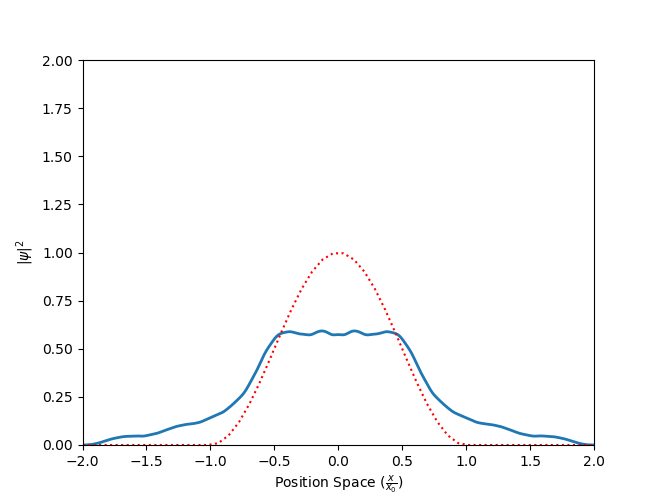

In [2]:
%matplotlib notebook

#time evolution, probability distribution
from matplotlib import animation

#expanded state at time t   
def ψ_t(cs, w, x, t):
    
    result = 0
    
    #sum over odd ns
    for n in range(len(cs)):      
        result = result + cs[n]*stationary_state(2*n+1, w, x)*np.exp(-(1j)*(n**2)*t)
        
    return result


#create animation
fig = plt.figure()
ax = plt.axes(xlim=(-w, w), ylim=(0, 2))
line, = ax.plot([], [], lw=2)

#initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

#animation function.  This is called sequentially
def animate(t):
    x = np.linspace(-w, w, 10000)
    
    y = np.abs(ψ_t(cs, w, x, t/6))**2
    
    line.set_data(x, y)
    return line,

#call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.linspace(0, 6*np.pi, 500), interval=1, blit=True)

plt.plot(xs,  np.abs(ψ(cs, w, xs))**2, color="red", linestyle=':')
plt.ylabel(r'$|\psi|^2$')
plt.xlabel(r'Position Space ($\frac{x}{x_0}$)')
plt.show()